#Name: Tejaswini Mohalkar, Aditi Subhedar, Vaibhavi Kulkarni, Vishakha More,
Roll no.: CS3155, CS3145, CS3124, CS3129
DIV: A
TY CS


#
data collection method. Describe dataset


In [1]:
import pandas as pd
data = pd.read_csv('salaries (2).csv')
print(data.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

In [2]:
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  16534.000000  1.653400e+04   16534.000000  16534.000000
mean    2023.226866  1.637270e+05  149686.777973     32.003750
std        0.713558  3.402057e+05   68505.293156     46.245158
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.017630e+05  101125.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.872000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [3]:
print(data.shape)

(16534, 11)


# 
preprocessing , cleaning
Like removing redundancy , duplicate values, null value, normalisation


In [4]:
# Check if the redundant column exists before dropping it

In [5]:
redundant_columns = ['ID']  

In [6]:
redundant_columns = [col for col in redundant_columns if col in data.columns]

In [7]:
if redundant_columns:
    data = data.drop(columns=redundant_columns)

In [8]:
# Remove duplicate values
data = data.drop_duplicates()

In [9]:
# Handle null values
data = data.dropna()

In [10]:
# Normalization
# Assuming numerical columns need normalization
numerical_columns = ['work_year', 'salary']  # Adjust based on your dataset


In [11]:
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())

In [12]:
# Display the cle
aned dataset
print(data.head())

   work_year experience_level employment_type                  job_title  \
0        1.0               SE              FT                AI Engineer   
1        1.0               SE              FT                AI Engineer   
2        1.0               SE              FT              Data Engineer   
3        1.0               SE              FT              Data Engineer   
4        1.0               SE              FT  Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  0.006211             USD         202730                 US             0   
1  0.002571             USD          92118                 US             0   
2  0.003834             USD         130500                 US             0   
3  0.002699             USD          96000                 US             0   
4  0.005792             USD         190000                 US             0   

  company_location company_size  
0               US            M  


In [13]:
print(data.shape) 

(10113, 11)


# 
Apply Decision tree algorithm , association rule 

Decision Tree 

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function importing Dataset
def importdata():
    balance_data = pd.read_csv('salaries (2).csv')
    
    # Printing the dataset shape
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    
    # Printing the dataset observations
    print("Dataset: ", balance_data.head())
    return balance_data

# Function to preprocess data
def preprocess_data(data):
    # Identify categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    # Perform label encoding for categorical columns with only 2 unique values
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        if len(data[column].unique()) == 2:
            data[column] = label_encoder.fit_transform(data[column])

    # Perform one-hot encoding for categorical columns with more than 2 unique values
    data = pd.get_dummies(data, columns=categorical_columns)
    
    return data

# Function to split the dataset
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.drop('salary', axis=1)  # Assuming 'salary' is your target variable
    Y = balance_data['salary']

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X_train, X_test, y_train, y_test

# Function to train the classifier using Gini index
def train_using_gini(X_train, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                       random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to train the classifier using entropy
def train_using_entropy(X_train, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to calculate accuracy and display results
def display_results(y_test, y_pred, method_name):
    print("Results Using", method_name, "Index:")
    print("Predicted values:")
    print(y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("Report:")
    print(classification_report(y_test, y_pred))

# Driver code
def main():
    # Building Phase
    data = importdata()
    data = preprocess_data(data)
    X_train, X_test, y_train, y_test = splitdataset(data)
    
    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)

    # Operational Phase
    y_pred_gini = clf_gini.predict(X_test)
    display_results(y_test, y_pred_gini, "Gini")

    y_pred_entropy = clf_entropy.predict(X_test)
    display_results(y_test, y_pred_entropy, "Entropy")

# Calling main function
if __name__ == "__main__":
    main()


Dataset Length:  16534
Dataset Shape:  (16534, 11)
Dataset:     work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location 

C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejas\anaconda3\Lib\site-packages\sklearn\metr

Apriori Algorithm (Association Rules)

In [12]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 901.1 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 901.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.

In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('salaries (2).csv')

# Drop non-categorical columns
data_apriori = data.drop(['work_year', 'salary', 'salary_currency', 'salary_in_usd'], axis=1)

# Convert 'remote_ratio' column to binary values (0 and 1)
data_apriori['remote_ratio'] = (data_apriori['remote_ratio'] > 0).astype(int)

# Perform one-hot encoding for categorical columns
data_apriori = pd.get_dummies(data_apriori)

# Apriori algorithm
frequent_itemsets = apriori(data_apriori, min_support=0.01, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules)


C:\Users\Tejas\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                  antecedents  \
0              (remote_ratio)   
1       (experience_level_EN)   
2       (experience_level_EX)   
3              (remote_ratio)   
4              (remote_ratio)   
...                       ...   
9447         (company_size_M)   
9448    (experience_level_SE)   
9449  (employee_residence_US)   
9450     (employment_type_FT)   
9451    (company_location_US)   

                                            consequents  antecedent support  \
0                                 (experience_level_EN)            0.327567   
1                                        (remote_ratio)            0.080138   
2                                        (remote_ratio)            0.030301   
3                                 (experience_level_EX)            0.327567   
4                                 (experience_level_SE)            0.327567   
...                                                 ...                 ...   
9447  (experience_level_SE, employee_residence_US,

#
Exploratory Data analysis of dataset

Dataset Shape: (10113, 11)
Columns: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10113 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           10113 non-null  float64
 1   experience_level    10113 non-null  object 
 2   employment_type     10113 non-null  object 
 3   job_title           10113 non-null  object 
 4   salary              10113 non-null  float64
 5   salary_currency     10113 non-null  object 
 6   salary_in_usd       10113 non-null  int64  
 7   employee_residence  10113 non-null  object 
 8   remote_ratio        10113 non-null  int64  
 9   company_location    10113 non-null  object 
 10  company_size        10113 non-nul

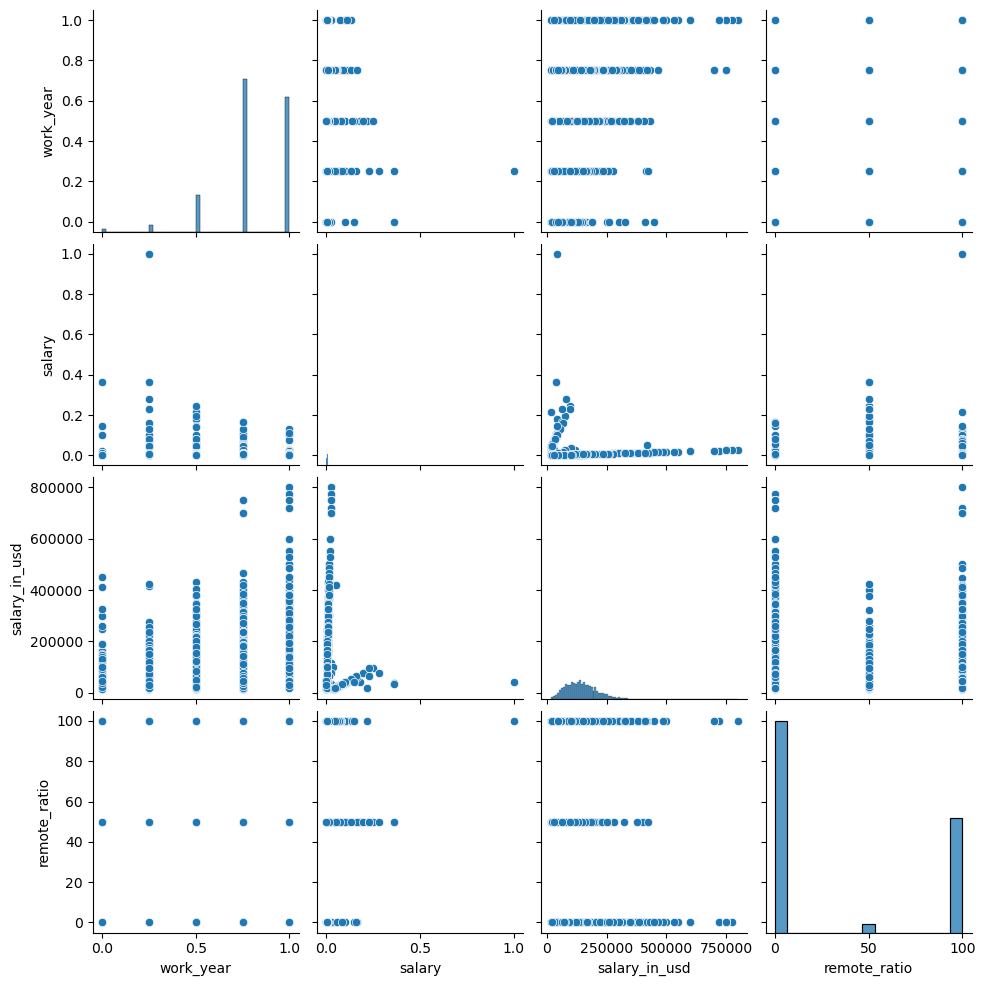

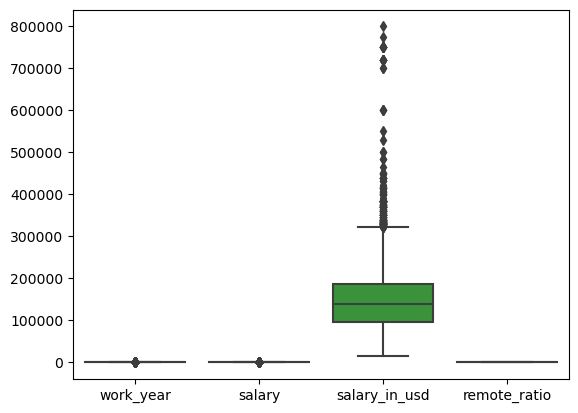

Missing Values: work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


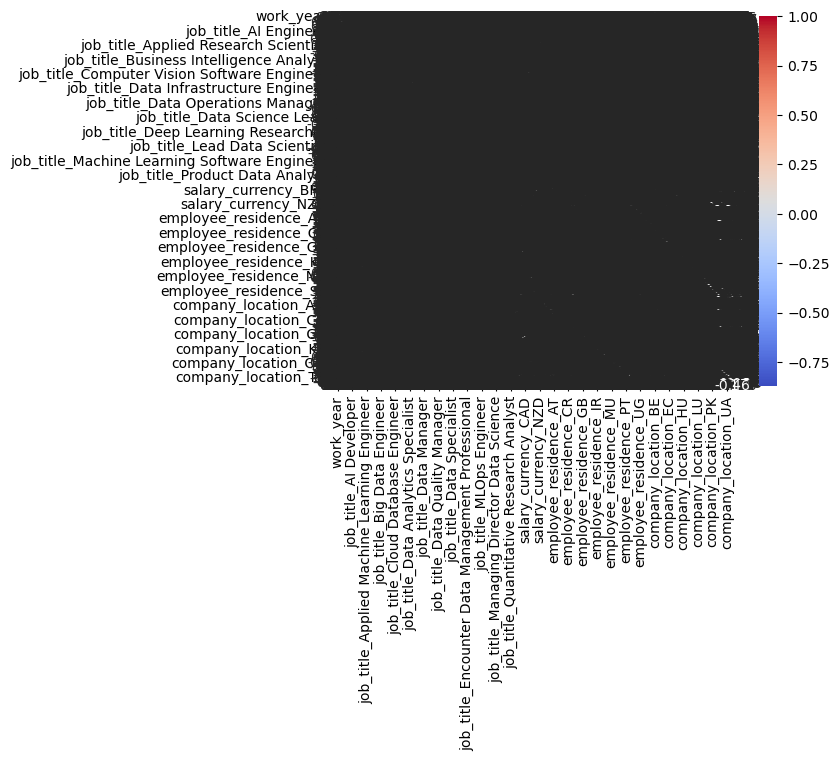

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('salaries (2).csv')

redundant_columns = ['ID']  
redundant_columns = [col for col in redundant_columns if col in data.columns]
if redundant_columns:
    data = data.drop(columns=redundant_columns)
# Remove duplicate values
data = data.drop_duplicates()
# Handle null values
data = data.dropna()
# Normalization
# Assuming numerical columns need normalization
numerical_columns = ['work_year', 'salary']  # Adjust based on your dataset

data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())

# Understanding the Data
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print("Info:", data.info())
print("Description:", data.describe())

# Summary Statistics
print("Summary Statistics:", data.describe(include='all'))

# Data Visualization
# Example visualizations
sns.pairplot(data)
plt.show()

sns.boxplot(data=data)
plt.show()

# Handle Missing Values
print("Missing Values:", data.isnull().sum())

# Handle Categorical Variables
# Example: Convert categorical variables to one-hot encoding
data_encoded = pd.get_dummies(data)

# Explore Relationships
# Example: Correlation matrix
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 
Apply linear regression model or logistics regression for prediction

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('salaries (2).csv')

# Remove redundant columns
redundant_columns = ['ID']  
redundant_columns = [col for col in redundant_columns if col in data.columns]
if redundant_columns:
    data = data.drop(columns=redundant_columns)

# Remove duplicate values
data = data.drop_duplicates()

# Handle null values
data = data.dropna()

# Normalization (if needed)
# Assuming numerical columns need normalization
numerical_columns = ['work_year', 'salary']  # Adjust based on your dataset
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())

# Split the data into features (X) and target variable (y)
X = data.drop('salary', axis=1)  # Remove the target variable
y = data['salary']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 322943.33675068815
Root Mean Squared Error: 568.281036768506
R-squared: -524583906.64083624


#
 Perform time series analysis on it.
Write interpretation and conclusion.

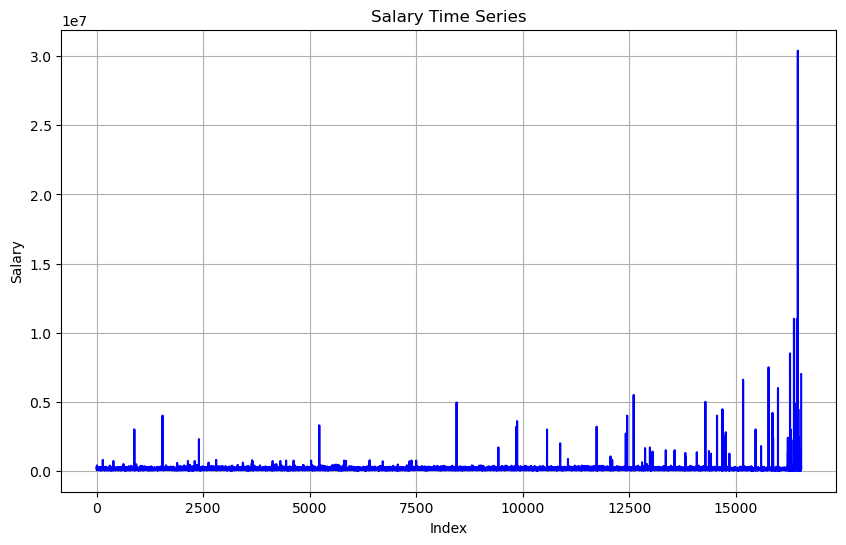

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('salaries (2).csv')

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['salary'], color='blue')
plt.title('Salary Time Series')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.grid(True)
plt.show()
